## Q4

## Regression function
https://github.com/FlorianMuellerklein/Machine-Learning

In [2]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import itertools


class Regression:
    def __init__(self, degree, learning_rate):  
        self.degree = degree
        self.W = np.random.rand(degree + 1) * 2 - np.ones(degree + 1)  
        self.learning_rate = learning_rate
        self.history_err_train = []
        self.history_err_test = []
        self.initial_learning_rate = learning_rate

    def train_by_data(self, X, y, epoch):
        for i in range(epoch):
            self.learning_rate -= self.learning_rate * (i / (epoch * 1.1))
            prev_W = self.W
            for j in range(X.shape[0]):
                x = X[j, :]
                y_exact = y[j]
                self.train_a_data(x, y_exact)
            self.history_err_train.append(self.precision_R2(X, y))

    def train_a_data(self, X, y):  
        prediction = self.calculate_value_without_activision_function(X)
        X = np.append(np.ones(1), X)

        self.W += self.learning_rate * (y - prediction) * X

    def calculate_value_without_activision_function(self, X):
        if not isinstance(X, np.ndarray):  
            print("its not a numpy matrix")
            return

        X = np.append(np.ones(1), X)
        z = np.dot(X, self.W)
        return z

    def calculate_value(self, X):
        if not isinstance(X, np.ndarray): 
            print("its not a numpy matrix calculate value")
            return

        ones = np.ones(X.shape[0])
        ones = ones.reshape((ones.shape[0], 1))
        X = np.reshape(X, (X.shape[0], -1))
        X = np.append(ones, X, axis=1)
        z = np.dot(X, self.W)
        return z

    def precision_R2(self, X, y_true):
        y_pred = self.calculate_value(X)
        sse = np.square(y_pred - y_true).sum()
        sst = np.square(y_true - y_true.mean()).sum()
        return 1 - sse / sst

    def press_statistic(self, y_true, y_pred, xs):
        res = y_pred - y_true
        hat = xs.dot(np.linalg.pinv(xs))
        den = (1 - np.diagonal(hat))
        sqr = np.square(res / den)
        return sqr.sum()

    def predicted_r2(self, y_true, X):
        y_pred = self.calculate_value(X)
        press = self.press_statistic(y_true=y_true, y_pred=y_pred, xs=X)
        sst = np.square(y_true - y_true.mean()).sum()
        return 1 - press / sst

    def plot_boundary_and_data(self, blues, reds, precision):
        x_axis = np.arange(-3, 9, 0.01)
        w = self.W
        y_axis = -w[0] / w[2] - x_axis * w[1] / w[2]

        plt.title(f'Adaline \n precision : {precision}  initial_learning_rate : {self.initial_learning_rate}')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.scatter(x_axis, y_axis)
        plt.scatter(blues['x'], blues['y'])
        plt.scatter(reds['x'], reds['y'])
        plt.show()

    def plot_curve_boundary_and_data(self, blues, reds, precision):
        x_axis = np.arange(-3, 9, 0.01)
        w = self.W
        x = np.linspace(-3, 5, 50)
        y = np.linspace(-5, 5, 50)
        X, Y = np.meshgrid(x, y)
        F = w[3] * X ** 2 + w[5] * X * Y + w[4] * Y ** 2 + w[1] * X + w[2] * Y + w[0]
        plt.title(f'Adaline \n  precision : {precision} initial_learning_rate : {self.initial_learning_rate}')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.contour(X, Y, F, levels=[0])  
        plt.scatter(blues['x'], blues['y'])
        plt.scatter(reds['x'], reds['y'])
        plt.show()

    def plot_accuracy_history(self, precision):
        plt.title(
            f'Adaline \n train_precision : {self.history_err_train[-1]} test_precision : {self.history_err_test[-1]} \ninitial_learning_rate : {self.initial_learning_rate}')
        plt.xlabel("epoch")
        plt.ylabel("precision")
        x = np.arange(0, len(self.history_err_test), 1)
        plt.plot(x, self.history_err_train, label="train", alpha=0.5)
        plt.plot(x, self.history_err_test, label="test", alpha=0.5)
        plt.legend()
        plt.show()
        
        
def powerset(elems):
    if len(elems) <= 1:
        yield elems
        yield []
    else:
        for item in powerset(elems[1:]):
            yield [elems[0]] + item
            yield item

## Q4 - A

In [3]:
raw_dataset = pd.read_csv('.\Inputs\Fish.csv',comment='\t',sep=',', skipinitialspace=True)
print(raw_dataset)
T_x = raw_dataset[['Length1', 'Length2', 'Length3', 'Height', 'Width']].to_numpy()
T_y = raw_dataset['Weight'].to_numpy()
#scaling:
T_x = (T_x - T_x.min()) / (T_x.max() - T_x.min())
RG = Regression(5, 0.1)
RG.train_by_data(T_x, T_y, 200)
precision = RG.precision_R2(T_x,T_y)
print(precision)



     Weight  Length1  Length2  Length3   Height   Width
0     242.0     23.2     25.4     30.0  11.5200  4.0200
1     290.0     24.0     26.3     31.2  12.4800  4.3056
2     340.0     23.9     26.5     31.1  12.3778  4.6961
3     363.0     26.3     29.0     33.5  12.7300  4.4555
4     430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...      ...      ...      ...      ...     ...
153    12.2     11.5     12.2     13.4   2.0904  1.3936
154    13.4     11.7     12.4     13.5   2.4300  1.2690
155    12.2     12.1     13.0     13.8   2.2770  1.2558
156    19.7     13.2     14.3     15.2   2.8728  2.0672
157    19.9     13.8     15.0     16.2   2.9322  1.8792

[158 rows x 6 columns]
0.8616800486823025


## Q4 - B

In [4]:
s_predictions = []
CN = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
conditions = list(powerset(CN))
raw_dataset = pd.read_csv('.\Inputs\Fish.csv', comment='\t', sep=',', skipinitialspace = True)
for i in range(len(conditions)):
    if len(conditions[i]) == 0:
        s_predictions.append(0)
        continue
    print("______________________________________")
    train_x = raw_dataset[conditions[i]].to_numpy()
    train_y = raw_dataset['Weight'].to_numpy()
    train_x = (train_x - train_x.min()) / (train_x.max() - train_x.min())
    train_y = train_y
    regression = Regression(len(conditions[i]), 0.1)
    regression.train_by_data(train_x, train_y, 100)
    precision = regression.precision_R2(train_x, train_y)
    s_predictions.append(precision)
    print(f'R2  : {precision}')
    print(f'predicted R2 :  {regression.predicted_r2(train_y, train_x)}')
    print("______________________________________")
index = 0
max = 0
for i in range(len(s_predictions)):
    if s_predictions[i] > max:
        max = s_predictions[i]
        index = i
print('\n''\n''\n')
print("______________________________________")
print('Recomended: ')
print(conditions[index])
print(s_predictions[index])
print("______________________________________")


______________________________________
R2  : 0.8603757776960722
predicted R2 :  0.8473610642187803
______________________________________
______________________________________
R2  : 0.8636936569539777
predicted R2 :  0.8523335600059221
______________________________________
______________________________________
R2  : 0.8638213722956257
predicted R2 :  0.852369565224559
______________________________________
______________________________________
R2  : 0.8647983070988476
predicted R2 :  0.8552721833063757
______________________________________
______________________________________
R2  : 0.8631003813497615
predicted R2 :  0.8525535734789617
______________________________________
______________________________________
R2  : 0.8714155218210472
predicted R2 :  0.8626901411738439
______________________________________
______________________________________
R2  : 0.8726576534219512
predicted R2 :  0.8638407636510157
______________________________________
___________________________________

## Q4 - C

In [24]:
cs = 0.0
bns = 0.0
selected = []
data = pd.read_csv('.\Inputs\Fish.csv', comment='\t', sep=',', skipinitialspace=True)
remaining = set(data.columns)
remaining.remove('Weight')
while remaining and cs == bns:
    scores_with_candidates = []
    for candidate in remaining:
        formula = "{} ~ {} + 1".format('Weight',
                                       ' + '.join(selected + [candidate]))
        score = smf.ols(formula, data).fit().rsquared_adj
        scores_with_candidates.append((score, candidate))
    scores_with_candidates.sort()
    bns, best = scores_with_candidates.pop()
    if cs < bns:
        remaining.remove(best)
        selected.append(best)
        cs = bns
formula = "{} ~ {}".format('Weight',
                     ' + '.join(selected))
model = smf.ols(formula, data).fit()
print(model.model.formula)
print(model.rsquared_adj)

Weight ~ Length3 + Width
0.8757636700691216


## Q4 - D

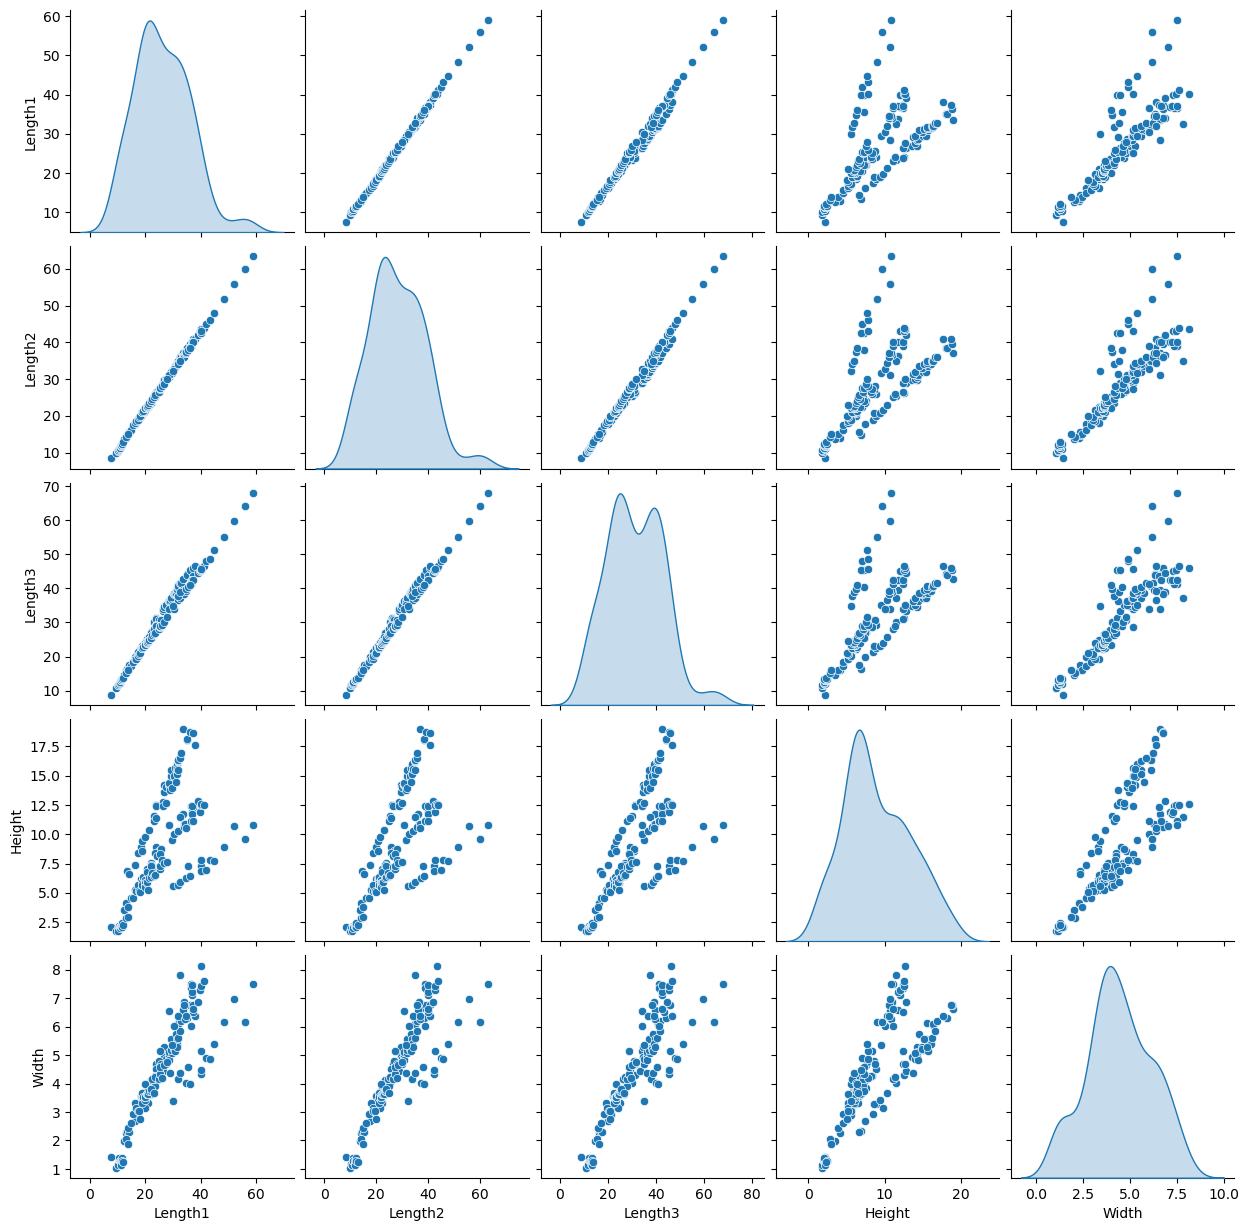

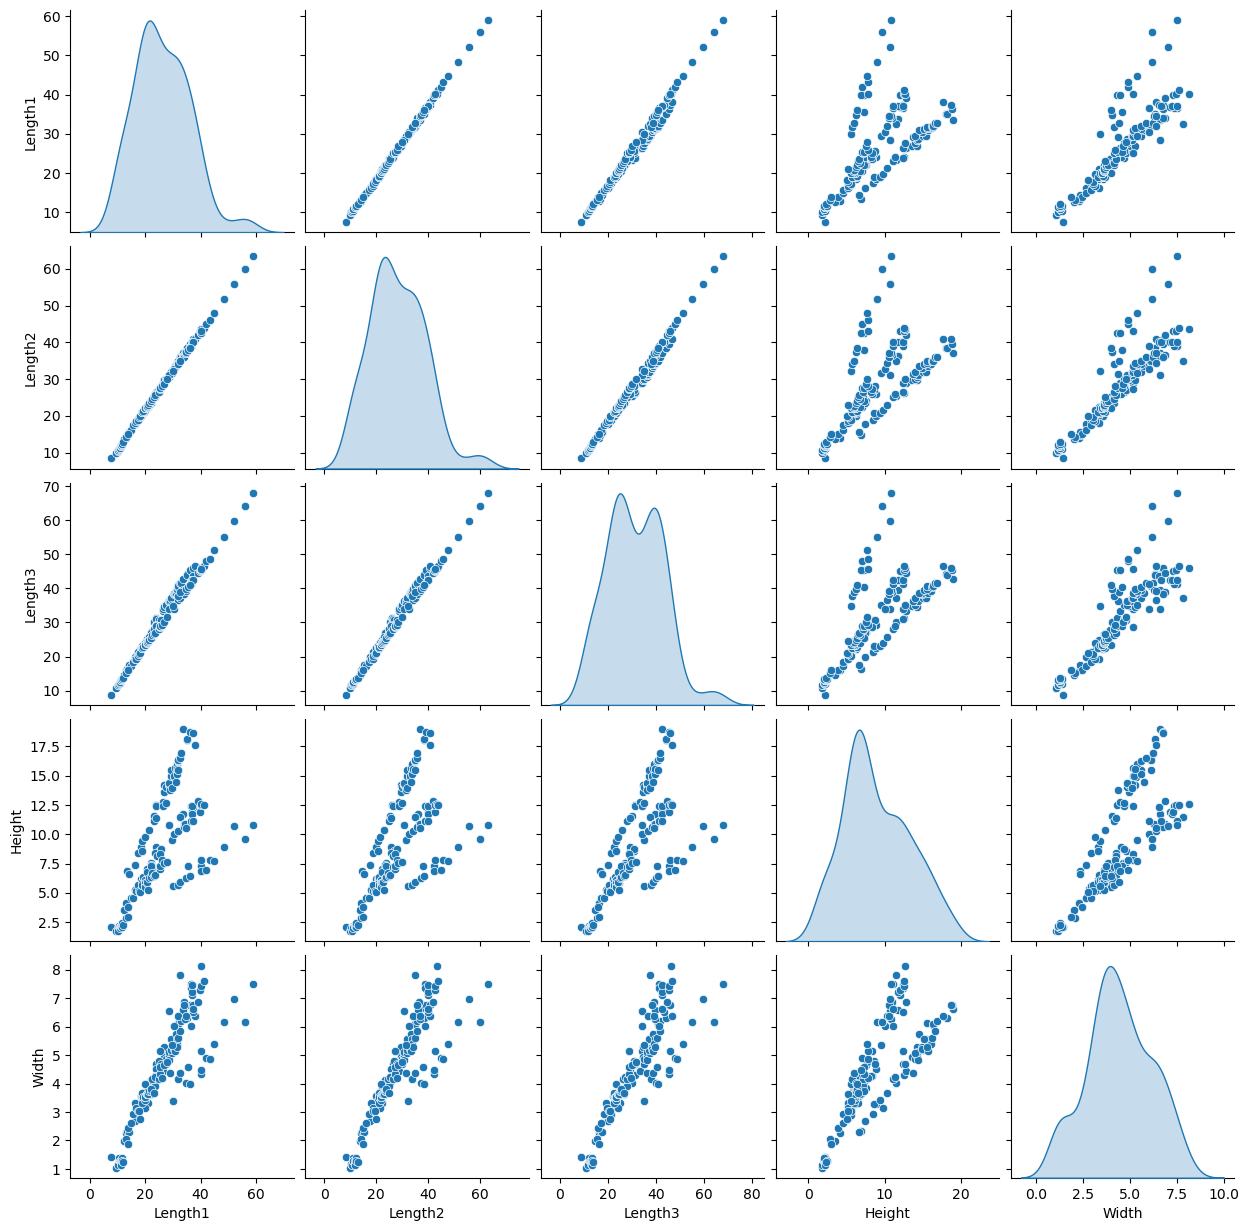

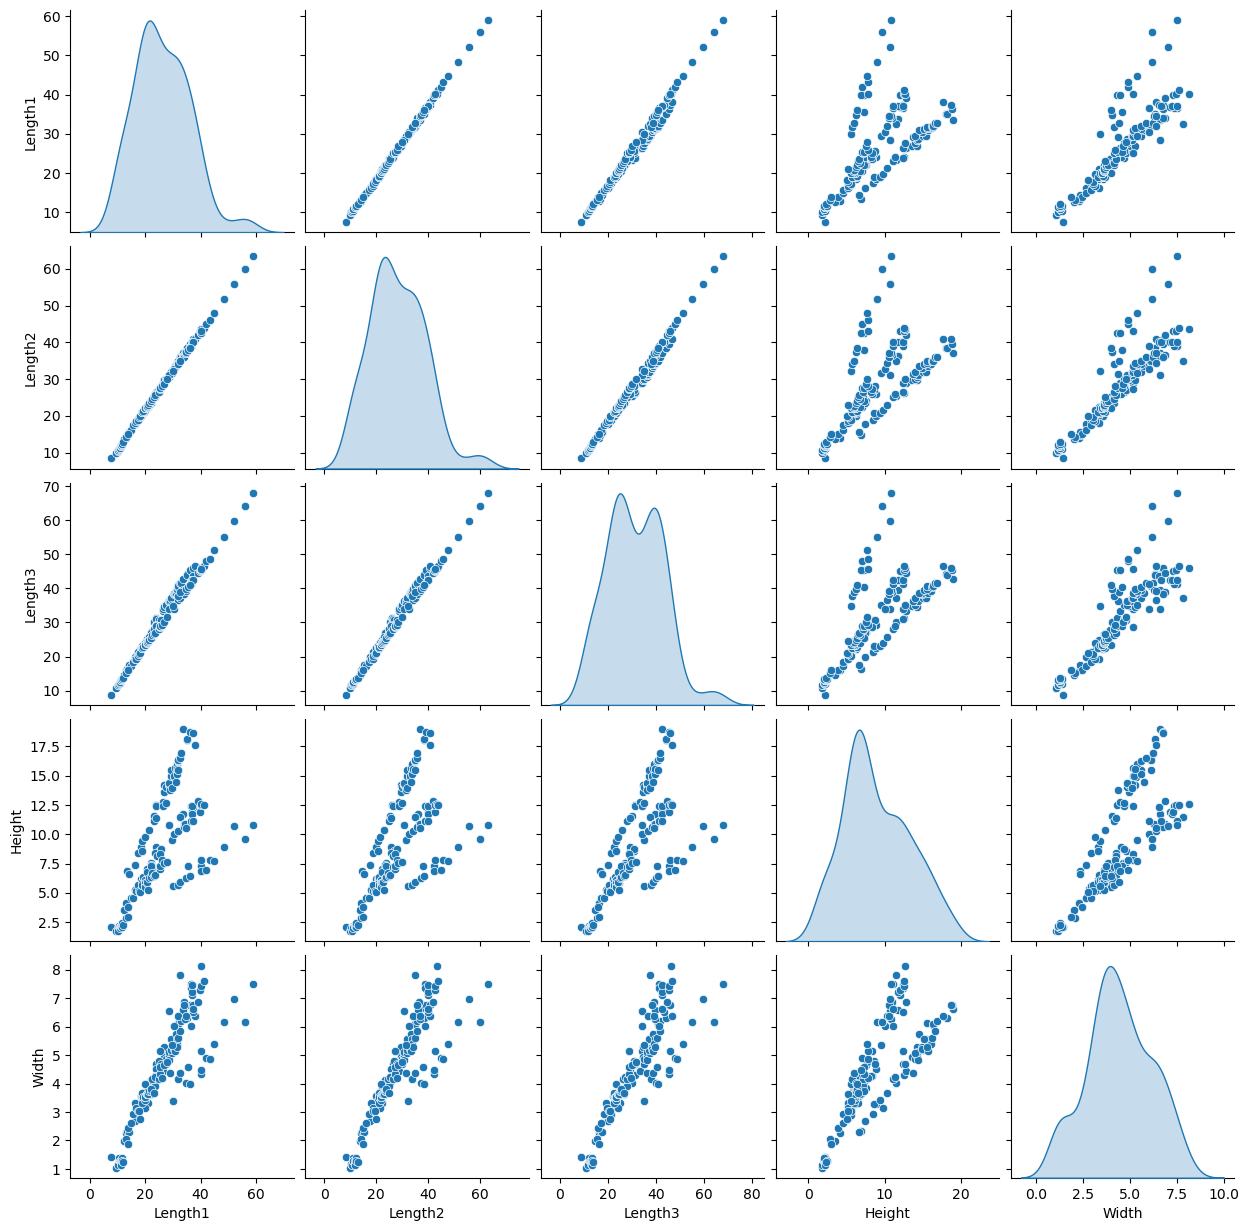

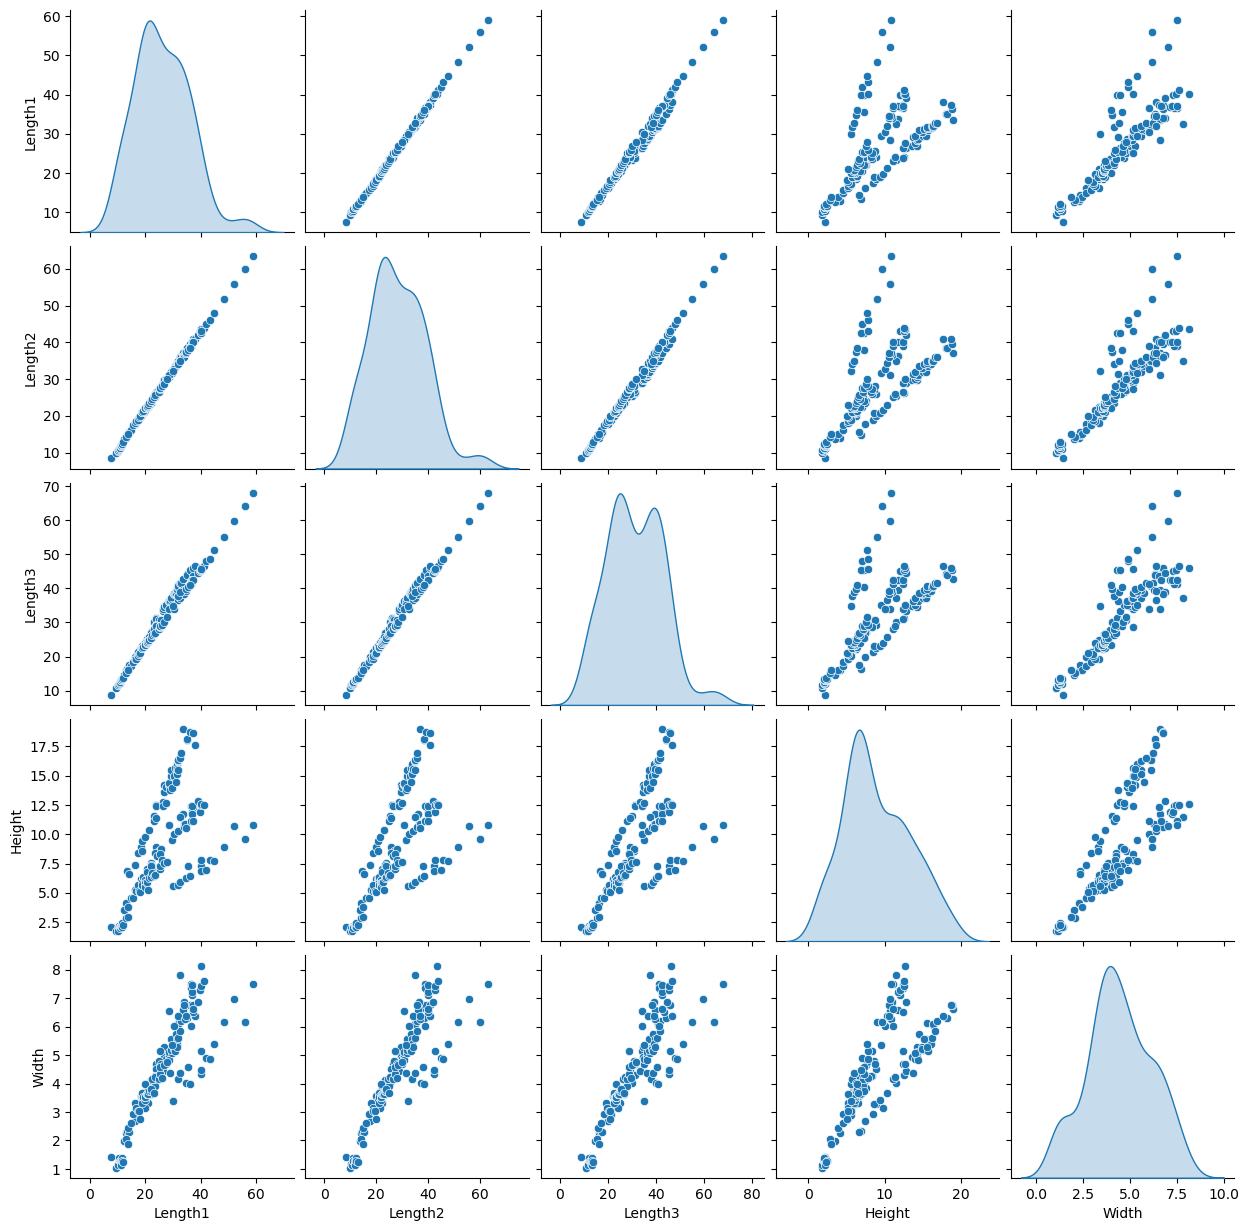

In [35]:
raw_dataset = pd.read_csv('.\Inputs\Fish.csv', comment='\t', sep=',', skipinitialspace=True)
CN = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
sns.pairplot(raw_dataset[CN], diag_kind='kde')
plt.show()

## Q4 - E

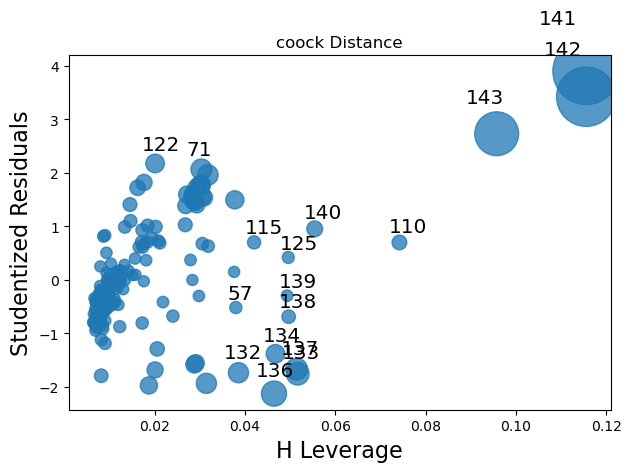

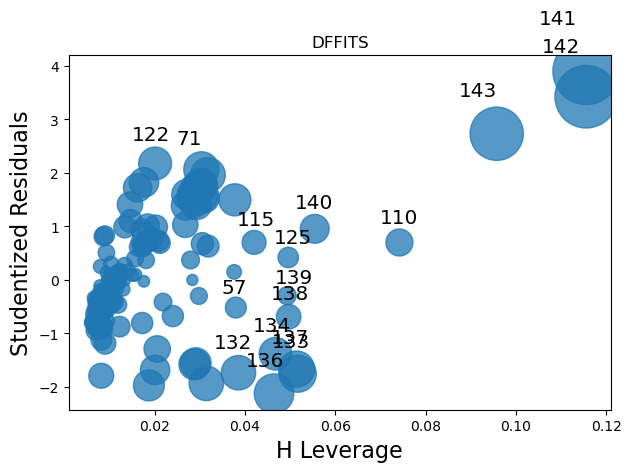

In [39]:

raw_dataset = pd.read_csv('.\Inputs\Fish.csv', comment='\t', sep=',', skipinitialspace=True)
var = ols("Weight ~ Length3 + Width + 1", data=raw_dataset).fit()
fig = sm.graphics.influence_plot(var, criterion="cooks")
plt.title("coock Distance")
fig.tight_layout(pad=1)
plt.show()
fig = sm.graphics.influence_plot(var, criterion="DFFITS")
plt.title("DFFITS")
fig.tight_layout(pad=1)
plt.show()

